### Preparatory(same as before)

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, auc, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

In [7]:
df = pd.read_csv("./data/diabetes_binary_5050.csv")
df["Diabetes_binary"] = df["Diabetes_binary"].astype(int)
df["HighBP"] = df["HighBP"].astype(int)
df["HighChol"] = df["HighChol"].astype(int)
df["CholCheck"] = df["CholCheck"].astype(int)
df["BMI"] = df["BMI"].astype(int)
df["Smoker"] = df["Smoker"].astype(int)
df["Stroke"] = df["Stroke"].astype(int)
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype(int)
df["PhysActivity"] = df["PhysActivity"].astype(int)
df["Fruits"] = df["Fruits"].astype(int) 
df["Veggies"] = df["Veggies"].astype(int)
df["HvyAlcoholConsump"] = df["HvyAlcoholConsump"].astype(int)
df["AnyHealthcare"] = df["AnyHealthcare"].astype(int)
df["NoDocbcCost"] = df["NoDocbcCost"].astype(int)
df["GenHlth"] = df["GenHlth"].astype(int)
df["MentHlth"] = df["MentHlth"].astype(int)
df["PhysHlth"] = df["PhysHlth"].astype(int)
df["DiffWalk"] = df["DiffWalk"].astype(int)
df["Sex"] = df["Sex"].astype(int)
df["Age"] = df["Age"].astype(int)
df["Education"] = df["Education"].astype(int)
df["Income"] =df["Income"].astype(int)

In [8]:
X_data = df.drop("Diabetes_binary", axis = 1)
Y_data = df["Diabetes_binary"]
label_encoder = LabelEncoder()
Y_data = label_encoder.fit_transform(Y_data)
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

## More models(with figue/data formatted same as before)

### Neural Netwok

In [9]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001)
mlp.fit(X_train , Y_train)
mlp_pred=mlp.predict(X_test)

In [10]:
metrics = ['f1', 'acc', 'prec', 'recall']
mlp_prec = precision_score(Y_test, mlp_pred, average = 'weighted')
mlp_f1 = f1_score(Y_test, mlp_pred, average = 'weighted')
mlp_acc = accuracy_score(Y_test, mlp_pred)
mlp_recall = recall_score(Y_test, mlp_pred, average = 'weighted')
mlp_scores = [mlp_f1, mlp_acc, mlp_prec, mlp_recall]
for i in range(0, 4):
    print(metrics[i] + ':' + str(round(mlp_scores[i], 5)))

f1:0.70585
acc:0.70585
prec:0.70588
recall:0.70585


In [11]:
matrix = classification_report(Y_test,mlp_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      7090
           1       0.70      0.71      0.71      7049

    accuracy                           0.71     14139
   macro avg       0.71      0.71      0.71     14139
weighted avg       0.71      0.71      0.71     14139



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

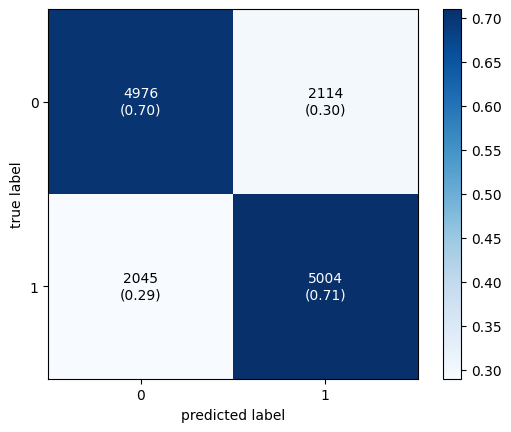

In [12]:
con_mat = confusion_matrix(Y_test,mlp_pred)
plot_confusion_matrix(conf_mat=con_mat,show_absolute=True,
                                show_normed=True,
                                colorbar=True)

### Gradient Boosting

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(X_train , Y_train)
gbc_pred=gbc.predict(X_test)

In [17]:
metrics = ['f1', 'acc', 'prec', 'recall']
gbc_prec = precision_score(Y_test, gbc_pred, average = 'weighted')  
gbc_f1 = f1_score(Y_test, gbc_pred, average = 'weighted')
gbc_acc = accuracy_score(Y_test, gbc_pred)
gbc_recall = recall_score(Y_test, gbc_pred, average = 'weighted')
gbc_scores = [gbc_f1, gbc_acc, gbc_prec, gbc_recall]
for i in range(0, 4):
    print(metrics[i] + ':' + str(round(gbc_scores[i], 5)))

f1:0.75313
acc:0.75331
prec:0.75418
recall:0.75331


In [23]:
matrix = classification_report(Y_test,gbc_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      7090
           1       0.74      0.78      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

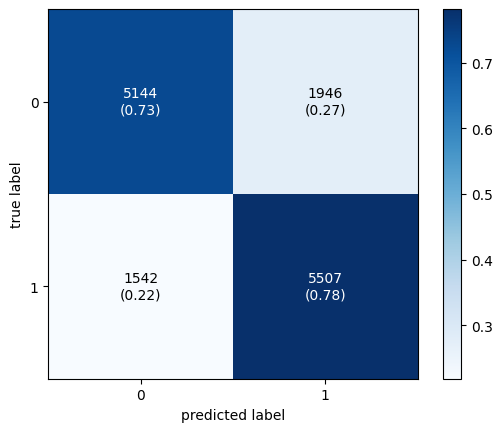

In [18]:
con_mat = confusion_matrix(Y_test,gbc_pred)
plot_confusion_matrix(conf_mat=con_mat,show_absolute=True,
                                show_normed=True,
                                colorbar=True)

<Axes: >

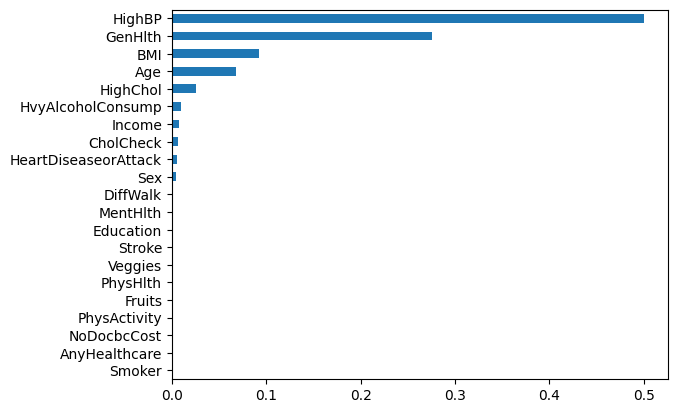

In [22]:
gbc_imp = pd.Series(gbc.feature_importances_, index=X_data.columns).sort_values(ascending=True)
gbc_imp.plot.barh()

In [26]:
gbc_mse = mean_squared_error(Y_test, gbc_pred)
print('Mean Squared Error: ' + str(round(gbc_mse, 5)))

Mean Squared Error: 0.24669


### AdaBoost

In [24]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(X_train , Y_train)
abc_pred=abc.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [27]:
metrics = ['f1', 'acc', 'prec', 'recall']
abc_prec = precision_score(Y_test, abc_pred, average = 'weighted')
abc_f1 = f1_score(Y_test, abc_pred, average = 'weighted')
abc_acc = accuracy_score(Y_test, abc_pred)
abc_recall = recall_score(Y_test, abc_pred, average = 'weighted')
abc_scores = [abc_f1, abc_acc, abc_prec, abc_recall]
for i in range(0, 4):
    print(metrics[i] + ':' + str(round(abc_scores[i], 5)))

f1:0.7517
acc:0.75182
prec:0.75243
recall:0.75182


In [31]:
matrix = classification_report(Y_test,abc_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      7090
           1       0.74      0.78      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

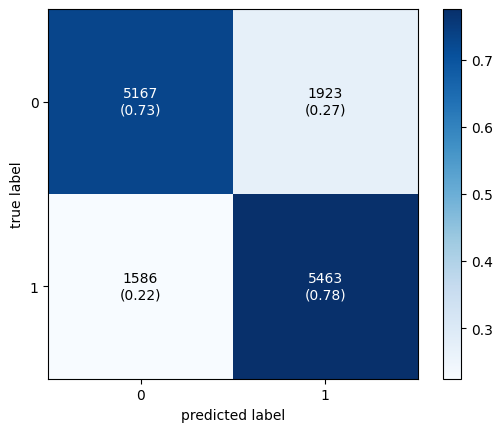

In [32]:
con_mat = confusion_matrix(Y_test,abc_pred)
plot_confusion_matrix(conf_mat=con_mat,show_absolute=True,
                                show_normed=True,
                                colorbar=True)

<Axes: >

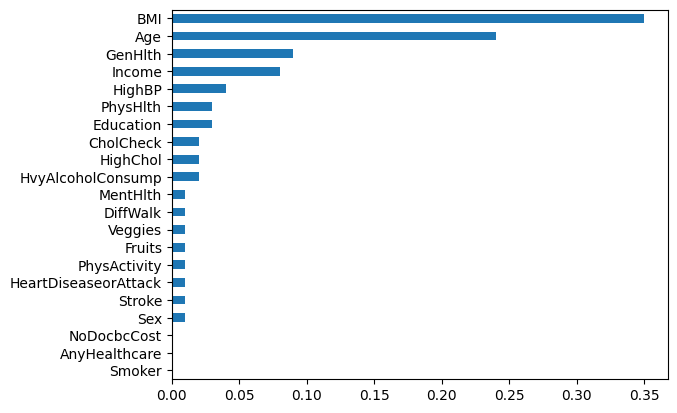

In [28]:
abc_imp = pd.Series(abc.feature_importances_, index=X_data.columns).sort_values(ascending=True)
abc_imp.plot.barh()

In [30]:
abc_mse = mean_squared_error(Y_test, abc_pred)
print('Mean Squared Error: ' + str(round(abc_mse, 5)))

Mean Squared Error: 0.24818


## Overall accuracy score

| Model     | Accuracy |
| ----------- | ----------- |
| Logistic Regression      | 0.7485     |
| Decision Tree   |    0.72594    |
| Random Forest      | 0.74447    |
| KNN  |   0.70139     |
| SVM      | 0.74843     |
| XGBoost   |   0.75416     |
| MLP | 0.70585 |
| GradientBoost | 0.75331 |
| AdaBoost | 0.75182 |